📂 Faça o upload do arquivo 'churn_data.csv'


Saving churn_data.csv to churn_data.csv
✅ Arquivo lido com sucesso usando {'sep': ',', 'encoding': 'utf-8'}

📊 RESULTADO DA ANÁLISE DE CHURN
Taxa de Churn: 36.00%
Clientes que cancelaram: 18
Clientes que permaneceram: 32
Total de clientes: 50


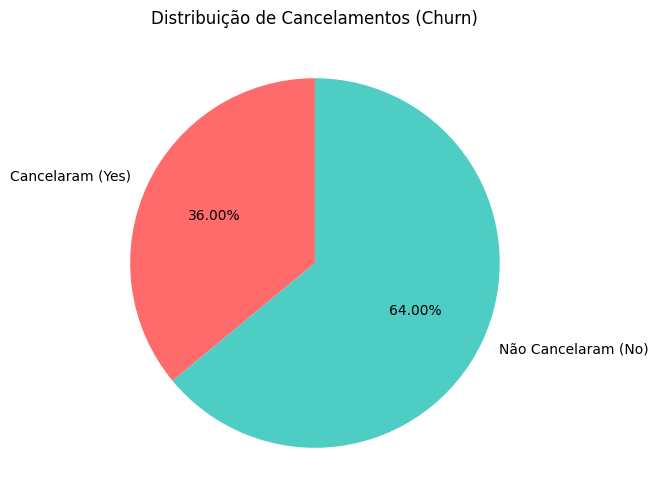

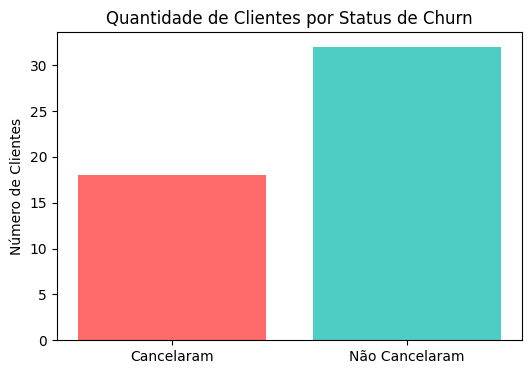

In [1]:
# ============================
# ANÁLISE DE CHURN COMPLETA
# ============================

import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# ----------------------------
# 1. Upload do arquivo
# ----------------------------
print("📂 Faça o upload do arquivo 'churn_data.csv'")
uploaded = files.upload()

# Pega o nome do arquivo enviado
csv_name = list(uploaded.keys())[0]

# ----------------------------
# 2. Tenta carregar o dataset
# ----------------------------
df = None
tentativas = [
    {"sep": ",", "encoding": "utf-8"},
    {"sep": ";", "encoding": "utf-8"},
    {"sep": ",", "encoding": "latin-1"},
    {"sep": ";", "encoding": "latin-1"},
]

for t in tentativas:
    try:
        df = pd.read_csv(csv_name, **t)
        print(f"✅ Arquivo lido com sucesso usando {t}")
        break
    except Exception as e:
        print(f"Tentativa falhou: {t} -> {e}")

if df is None:
    raise ValueError("❌ Não foi possível carregar o arquivo CSV. Verifique o separador e encoding.")

# ----------------------------
# 3. Validar coluna 'Churn'
# ----------------------------
if "Churn" not in df.columns:
    possiveis = [c for c in df.columns if c.lower() == "churn"]
    if possiveis:
        df = df.rename(columns={possiveis[0]: "Churn"})
        print(f"⚠️ Coluna renomeada de {possiveis[0]} para 'Churn'")
    else:
        raise ValueError(f"❌ A coluna 'Churn' não foi encontrada. Colunas disponíveis: {list(df.columns)}")

# ----------------------------
# 4. Cálculos principais
# ----------------------------
total_clientes = len(df)
cancelaram = (df["Churn"] == "Yes").sum()
nao_cancelaram = (df["Churn"] == "No").sum()
taxa_churn = (cancelaram / total_clientes) * 100

# ----------------------------
# 5. Resultado no console
# ----------------------------
print("\n📊 RESULTADO DA ANÁLISE DE CHURN")
print(f"Taxa de Churn: {taxa_churn:.2f}%")
print(f"Clientes que cancelaram: {cancelaram}")
print(f"Clientes que permaneceram: {nao_cancelaram}")
print(f"Total de clientes: {total_clientes}")

# ----------------------------
# 6. Gráfico de pizza
# ----------------------------
plt.figure(figsize=(6,6))
plt.pie(
    [cancelaram, nao_cancelaram],
    labels=["Cancelaram (Yes)", "Não Cancelaram (No)"],
    autopct="%1.2f%%",
    startangle=90,
    colors=["#FF6B6B", "#4ECDC4"]
)
plt.title("Distribuição de Cancelamentos (Churn)")
plt.show()

# ----------------------------
# 7. Gráfico de barras
# ----------------------------
plt.figure(figsize=(6,4))
plt.bar(
    ["Cancelaram", "Não Cancelaram"],
    [cancelaram, nao_cancelaram],
    color=["#FF6B6B", "#4ECDC4"]
)
plt.title("Quantidade de Clientes por Status de Churn")
plt.ylabel("Número de Clientes")
plt.show()